# Differential expression analysis
This notebook performs differential expression analysis using the real template experiment and simulated experiments, as a null set. 

In [1]:
%load_ext autoreload
%load_ext rpy2.ipython
%autoreload 2

import os
import sys
import pandas as pd
import numpy as np
import random
import seaborn as sns
import rpy2.robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import pandas2ri
pandas2ri.activate()
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

from ponyo import utils

from numpy.random import seed
randomState = 123
seed(randomState)

/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# Read in config variables
base_dir = os.path.abspath(os.path.join(os.getcwd(),"../"))

config_file = os.path.abspath(os.path.join(base_dir,
                                           "config_human.tsv"))
params = utils.read_config(config_file)

In [3]:
# Load params
local_dir = params["local_dir"]
dataset_name = params['dataset_name']
num_runs = params['num_simulated']
project_id = params['project_id']
col_to_rank = params['col_to_rank']
template_data_file = params['template_data_file']

rerun_template = True
rerun_simulated = True

# Load metadata file with grouping assignments for samples
metadata_file = os.path.join(
    base_dir,
    dataset_name,
    "data",
    "metadata",
    project_id+"_groups.tsv")

## Install R libraries

In [4]:
%%R
# Select 59
# Run one time
#if (!requireNamespace("BiocManager", quietly = TRUE))
#    install.packages("BiocManager")
#BiocManager::install("limma")
#BiocManager::install('EnhancedVolcano')
#devtools::install_github('kevinblighe/EnhancedVolcano')

NULL


In [5]:
%%R
library('limma')

### Get differentially expressed genes from template experiment

In [6]:
%%R -i metadata_file -i project_id -i template_data_file -i local_dir -i rerun_template

source('../generic_expression_patterns_modules/DE_analysis.R')

out_file <- paste(local_dir,
                  "DE_stats/DE_stats_template_data_",
                  project_id,
                  "_real.txt",
                  sep="")

if (rerun_template){
    get_DE_stats(metadata_file,
                 project_id, 
                 template_data_file,
                 "template",
                 local_dir,
                 "real")
    }

[1] 2361


### Check signal strength

In [7]:
# Load association statistics for template experiment
template_DE_stats_file = os.path.join(
    local_dir,
    "DE_stats",
    "DE_stats_template_data_"+project_id+"_real.txt")

In [8]:
template_DE_stats = pd.read_csv(
    template_DE_stats_file,
    header=0,
    sep='\t',
    index_col=0)

template_DEGs = template_DE_stats[(template_DE_stats['adj.P.Val']<0.001) & 
                                  (template_DE_stats['logFC'].abs()>1)]
print(template_DEGs.shape)
template_DEGs.head(10)

(2361, 6)


,logFC,AveExpr,t,P.Value,adj.P.Val,B
SNRK.AS1,-4.958371,5.900715,-21.028847,2.615538e-16,3.049023e-12,26.905199
ITIH5,-3.703407,3.134390,-20.765642,3.428180e-16,3.049023e-12,26.662724
HYOU1,15.428655,22.573867,17.943977,7.697954e-15,4.564373e-11,23.820691
GATA6,-10.775702,9.814635,-17.441516,1.401198e-14,5.823299e-11,23.263321
KIAA0040,-16.443337,16.758748,-17.144691,2.010212e-14,5.823299e-11,22.926022
PXDC1,-20.778738,22.482341,-17.103739,2.113736e-14,5.823299e-11,22.879006
ITGA8,-7.371572,6.564904,-17.038028,2.291606e-14,5.823299e-11,22.803318
SH3BP5.AS1,-14.343534,17.211195,-16.571631,4.098182e-14,9.112307e-11,22.257258
STX11,-23.845923,16.245391,-16.457504,4.734689e-14,9.357849e-11,22.121231
STX2,-4.236599,6.620074,-16.277501,5.955825e-14,1.059422e-10,21.904717


In [9]:
%%R
library(EnhancedVolcano)


Error in library(EnhancedVolcano) : 
  there is no package called ‘EnhancedVolcano’


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in library(EnhancedVolcano) : 
  there is no package called ‘EnhancedVolcano’

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: In addition: 
  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Warning message:

  warnings.warn(x, RRuntimeWarning)
/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Zero sample variances detected, have been offset away from zero 

  warnings.warn(x, RRuntimeWarning)


In [10]:
%%R -i project_id -i template_DE_stats_file -i local_dir

source('../generic_expression_patterns_modules/DE_analysis.R')

create_volcano(template_DE_stats_file,
               project_id,
               "adj.P.Val",
               local_dir)


Error in EnhancedVolcano(res, lab = rownames(res), x = "logFC", y = "adj.P.Val",  : 
  could not find function "EnhancedVolcano"


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/rpy2/rinterface/__init__.py:146: RRuntimeWarning: Error in EnhancedVolcano(res, lab = rownames(res), x = "logFC", y = "adj.P.Val",  : 
  could not find function "EnhancedVolcano"

  warnings.warn(x, RRuntimeWarning)


### Get differentially expressed genes from each simulated experiment

In [11]:
%%R -i metadata_file -i project_id -i base_dir -i local_dir -i num_runs -i rerun_simulated -o num_sign_DEGs_simulated

source('../generic_expression_patterns_modules/DE_analysis.R')

num_sign_DEGs_simulated <- c()

for (i in 0:(num_runs-1)){
    simulated_data_file <- paste(local_dir, 
                                 "pseudo_experiment/selected_simulated_data_",
                                 project_id,
                                 "_", 
                                 i,
                                 ".txt",
                                 sep="")
    out_file <- paste(local_dir, 
                      "DE_stats/DE_stats_simulated_data_",
                      project_id,
                      "_",
                      i,
                      ".txt", 
                      sep="")
    
    if (rerun_simulated){
        run_output <- get_DE_stats(metadata_file,
                                   project_id, 
                                   simulated_data_file,
                                   "simulated",
                                   local_dir,
                                   i)
        num_sign_DEGs_simulated <- c(num_sign_DEGs_simulated, run_output)
    } else {
        # Read in DE stats data
        DE_stats_data <- as.data.frame(read.table(out_file, sep="\t", header=TRUE, row.names=1))
        
        # Get number of genes that exceed threshold
        threshold <- 0.001
        sign_DEGs <- DE_stats_data[DE_stats_data[,'adj.P.Val']<threshold & abs(DE_stats_data[,'logFC'])>1,]
        
        num_sign_DEGs <- nrow(sign_DEGs)
        
        num_sign_DEGs_simulated <- c(num_sign_DEGs_simulated, num_sign_DEGs)
    }
}

[Text(0, 0.5, 'Number of simulated experiments'),
 Text(0.5, 0, 'Number of DEGs')]

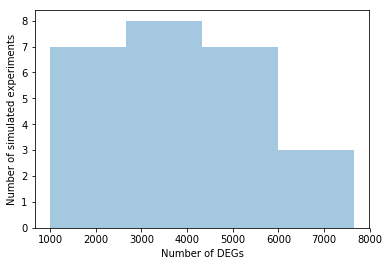

In [22]:
# Plot distribution of differentially expressed genes for simulated experiments
ax = sns.distplot(num_sign_DEGs_simulated,
            kde=False)
ax.set(xlabel='Number of DEGs', ylabel="Number of simulated experiments")

**Check**

As a check, we compared the number of DEGs identified here versus what was reported in the [Kim et. al. publication](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3566005/#pone.0055596.s008), which found:
* Four conditions needed to be met for the genes to be selected as differentially expressed genes (DEGs): (i) overall differential expression from the edgeR analysis with FDR < 0.001, (ii) a minimum of 3 patients with significant differential expression, as tested by edgeR for individual differential expression with FDR < 0.01, (iii) consistent up/down regulation among different patients representing more than a two-fold change, and (iv) significant expression in at least 3 patients to remove genes with large fold changes within the noise expression level (FVKM>2 in either normal or tumor tissue). 
* In total, we selected 1459 genes (543 upregulated and 916 downregulated in tumors) differentially expressed in female NSCLC never-smoker patients
* Used edgeR to identify DEGs

By comparison:
* Our study found 2358 DEGs using limma and applying FDR < 0.001 
* Spot checking the genes identified with their list of DEGs from S2, we found the some of the same genes and FC direction was consistent. 
* Currently we are normalizing read counts [downloaded from recount2](https://bioconductor.org/packages/devel/bioc/vignettes/recount/inst/doc/recount-quickstart.html) using RPKM and piping that through limma to identify DEG (this is legacy code from when we expected microarray input instead of RNA-seq)

## Get statistics for differential expression analysis

In [13]:
# Get ranks of template experiment

# If ranking by p-value or adjusted p-value then high rank = low value
if col_to_rank in ['P.Value', 'adj.P.Val']:
    template_DE_stats['ranking'] = template_DE_stats[col_to_rank].rank(ascending = False)
    template_DE_stats = template_DE_stats.sort_values(by=col_to_rank, ascending=True)

# If ranking by logFC then high rank = high abs(value)
elif col_to_rank in ['logFC','t']:
    template_DE_stats['ranking'] = template_DE_stats[col_to_rank].abs().rank(ascending = True)
    template_DE_stats = template_DE_stats.sort_values(by=col_to_rank, ascending=False)

# If ranking by Z-score then high rank = high value
else:
    template_DE_stats['ranking'] = template_DE_stats[col_to_rank].rank(ascending = True)
    template_DE_stats = template_DE_stats.sort_values(by=col_to_rank, ascending=False)

template_DE_stats.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B,ranking
IGHG1,4217.285092,2847.658556,2.673512,0.013707,0.034427,-3.801130,17787.0
SCGB3A1,2953.135576,1565.924672,2.016830,0.055778,0.107343,-5.077643,17785.0
CEACAM6,682.863735,420.210228,4.225483,0.000333,0.001748,-0.220385,17784.0
IGLL5,605.225857,482.844988,3.306012,0.003143,0.010616,-2.405372,17782.0
COL1A1,372.527241,283.027840,2.744314,0.011680,0.030352,-3.651605,17776.0


In [14]:
# Concatenate simulated experiments
simulated_DE_stats_all = pd.DataFrame()
for i in range(num_runs):
    simulated_DE_stats_file = os.path.join(
        local_dir, 
        "DE_stats",
        "DE_stats_simulated_data_"+project_id+"_"+str(i)+".txt")
    
    #Read results
    simulated_DE_stats = pd.read_csv(
        simulated_DE_stats_file,
        header=0,
        sep='\t',
        index_col=0)
    
    simulated_DE_stats.reset_index(inplace=True)
    
    # Concatenate df
    simulated_DE_stats_all = pd.concat([simulated_DE_stats_all,
                                       simulated_DE_stats])
    
print(simulated_DE_stats_all.shape)
simulated_DE_stats_all.head()

(444700, 7)


,index,logFC,AveExpr,t,P.Value,adj.P.Val,B
0,SFPQ,-8.696000,34.135000,-16.032028,7.764206e-14,7.458420e-10,21.505784
1,TOB1.AS1,0.243833,0.721500,15.972897,8.385901e-14,7.458420e-10,21.434650
2,ZNF814,0.402167,2.604000,15.398911,1.793930e-13,1.063681e-09,20.729635
3,ANXA6,-13.179333,30.577583,-14.280093,8.473022e-13,3.767953e-09,19.275673
4,RNF207,0.899250,2.349208,14.017464,1.237445e-12,4.402334e-09,18.918186


In [15]:
# Aggregate statistics across all simulated experiments
if col_to_rank == "adj.P.Val":
    simulated_DE_summary_stats = simulated_DE_stats_all.groupby(['index'])[[col_to_rank]].agg(
        ['median','mean', 'std','count']
    )
else:
    simulated_DE_summary_stats = simulated_DE_stats_all.groupby(['index'])[[col_to_rank, 'adj.P.Val']].agg({
        col_to_rank:['median','mean', 'std','count'],
        'adj.P.Val':['median']
    })
simulated_DE_summary_stats.head()

logFC                              adj.P.Val
             median       mean         std count    median
index                                                     
A1BG       0.804167   2.546190    4.015832    25  0.001628
A1BG.AS1   0.536000   1.100307    1.268526    25  0.006113
A1CF       0.467667   0.929980    1.173673    25  0.000362
A2M      -50.579750 -77.660463  115.204686    25  0.000090
A2M.AS1   -2.346167  -3.112170    6.838669    25  0.000275

In [16]:
# Rank gene by median value of col_to_rank for simulated experiments

# If ranking by p-value or adjusted p-value then high rank = low value
if col_to_rank in ['P.Value', 'adj.P.Val']:
    simulated_DE_summary_stats['ranking'] = simulated_DE_summary_stats[(col_to_rank,'median')].rank(ascending = False)
    simulated_DE_summary_stats = simulated_DE_summary_stats.sort_values(by=(col_to_rank,'median'), ascending=True)

# If ranking by logFC then high rank = high abs(value)
elif col_to_rank in ['logFC','t']:
    simulated_DE_summary_stats['ranking'] = simulated_DE_summary_stats[(col_to_rank,'median')].abs().rank(ascending = True)
    simulated_DE_summary_stats = simulated_DE_summary_stats.sort_values(by=(col_to_rank,'median'), ascending=False)

# If ranking by Z-score then high rank = high value
else:
    simulated_DE_summary_stats['ranking'] = simulated_DE_summary_stats[(col_to_rank,'median')].rank(ascending = True)
    simulated_DE_summary_stats = simulated_DE_summary_stats.sort_values(by=(col_to_rank,'median'), ascending=False)

simulated_DE_summary_stats.head()

logFC                               adj.P.Val  ranking
             median        mean         std count    median         
index                                                               
RPPH1    157.638250  291.869627  557.353605    25  0.000387  17788.0
GAPDH    129.644083   83.268190  189.633044    25  0.000007  17786.0
S100A9   121.602667  125.348943  266.823875    25  0.005007  17784.0
TMSB10    97.820000   57.566137  258.471498    25  0.005146  17779.0
S100A11   96.913167  118.518453   89.378507    25  0.000223  17777.0

In [17]:
simulated_DE_summary_stats.tail()

logFC                                   adj.P.Val  ranking
             median        mean         std count        median         
index                                                                   
JUNB    -104.068333 -122.707103  108.613631    25  8.340548e-07  17781.0
HLA.DRA -109.232583 -117.905730  152.862856    25  8.682243e-02  17782.0
TMSB4X  -109.378333 -153.373730  113.444799    25  2.845855e-04  17783.0
SFTPA2  -128.009750 -295.042380  417.296103    25  6.643327e-04  17785.0
SFTPC   -150.413167 -268.119200  376.848984    25  7.007385e-04  17787.0

In [18]:
# Merge template statistics with simulated statistics
template_simulated_DE_stats = template_DE_stats.merge(simulated_DE_summary_stats, 
                                                     left_index=True,
                                                     right_index=True)
print(template_simulated_DE_stats.shape)
template_simulated_DE_stats.head()

(17788, 13)


/home/alexandra/anaconda3/envs/generic_expression/lib/python3.7/site-packages/pandas/core/reshape/merge.py:544: UserWarning: merging between different levels can give an unintended result (1 levels on the left, 2 on the right)
  warnings.warn(msg, UserWarning)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,ranking,"(logFC, median)","(logFC, mean)","(logFC, std)","(logFC, count)","(adj.P.Val, median)","(ranking, )"
IGHG1,4217.285092,2847.658556,2.673512,0.013707,0.034427,-3.801130,17787.0,74.636833,143.226800,315.063709,25,0.035948,17774.0
SCGB3A1,2953.135576,1565.924672,2.016830,0.055778,0.107343,-5.077643,17785.0,56.340167,106.118687,166.169100,25,0.002523,17767.0
CEACAM6,682.863735,420.210228,4.225483,0.000333,0.001748,-0.220385,17784.0,36.772250,38.763833,36.167438,25,0.000333,17753.0
IGLL5,605.225857,482.844988,3.306012,0.003143,0.010616,-2.405372,17782.0,60.553000,92.146380,151.211438,25,0.024039,17771.0
COL1A1,372.527241,283.027840,2.744314,0.011680,0.030352,-3.651605,17776.0,29.542250,38.261733,78.846208,25,0.000310,17740.0


[Text(0, 0.5, 'Number of genes'), Text(0.5, 0, 'Ranking')]

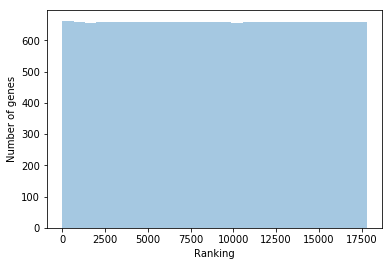

In [21]:
ax = sns.distplot(template_simulated_DE_stats[('ranking',"")].values, kde=False)
ax.set(xlabel='Ranking', ylabel="Number of genes")

In [ ]:
# Parse columns
median_pval_simulated = template_simulated_DE_stats[('adj.P.Val','median')]
mean_test_simulated = template_simulated_DE_stats[(col_to_rank,'mean')]
std_test_simulated = template_simulated_DE_stats[(col_to_rank,'std')]
count_simulated = template_simulated_DE_stats[(col_to_rank,'count')]
rank_simulated = template_simulated_DE_stats[('ranking','')]

In [ ]:
summary = pd.DataFrame(data={'Gene ID': template_simulated_DE_stats.index,
                             'Adj P-value (Real)': template_simulated_DE_stats['adj.P.Val'],
                             'Rank (Real)': template_simulated_DE_stats['ranking'],
                             'Test statistic (Real)': template_simulated_DE_stats[col_to_rank],
                             'Median adj p-value (simulated)': median_pval_simulated ,
                             'Rank (simulated)': rank_simulated ,
                             'Mean test statistic (simulated)': mean_test_simulated ,
                             'Std deviation (simulated)': std_test_simulated,
                             'Number of experiments (simulated)': count_simulated
                            }
                      )
summary['Z score'] = (summary['Test statistic (Real)'] - summary['Mean test statistic (simulated)'])/summary['Std deviation (simulated)']
summary.head()

In [ ]:
# Save file
summary_file = os.path.join(
        local_dir, 
        "gene_summary_table_"+col_to_rank+".tsv")

#summary.to_csv(summary_file, float_format='%.5f', sep='\t')